In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Displays a progress bar

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, Subset, DataLoader, random_split
!pip install torchattacks
import torchattacks
import random


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:

# Load the dataset and train, val, test splits
print("Loading datasets...")
my_transformer = transforms.Compose([
    transforms.ToTensor(),
])
MNIST_train = datasets.MNIST('.', download=True, train=True, transform=my_transformer)
MNIST_test = datasets.MNIST('.', download=True, train=False, transform=my_transformer)


Loading datasets...


In [17]:

BATCH_SIZE = 100
trainloader = DataLoader(MNIST_train, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(MNIST_test, batch_size=BATCH_SIZE)

In [18]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),                                            
            nn.MaxPool2d(kernel_size=2),   
            nn.ReLU(),         
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),                        
            nn.MaxPool2d(2),   
            nn.ReLU(),                
        )
        self.out = nn.Linear(1152, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu" # Configure device
model = Network()
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/bestModelUpdated.pt'))

<All keys matched successfully>

In [20]:
attack = torchattacks.CW(model, c=2.5, kappa=0, steps=50, lr=0.05)
num_samples = 0
correct_prediction = 0
images = []
perturbations = []
for image, target_label in tqdm(testloader):
  adv_images = attack(image, target_label)
  images.append(image)
  perturbations.append(adv_images)

100%|██████████| 100/100 [04:01<00:00,  2.42s/it]


Saving Adversarial Visualizations for 10-step PGD Attack...


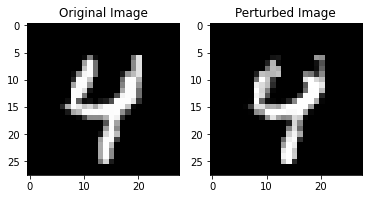

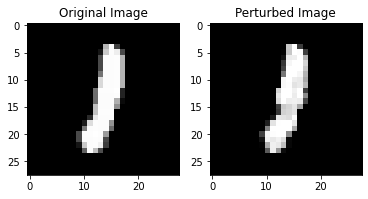

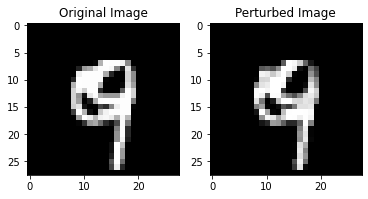

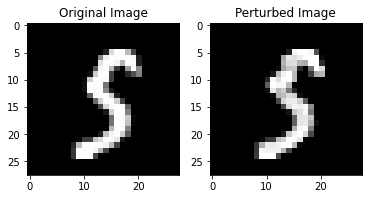

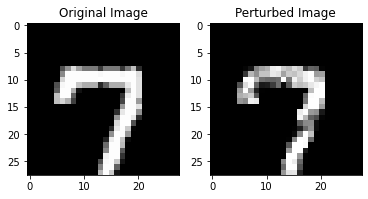

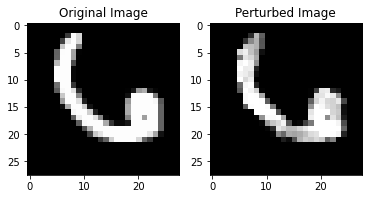

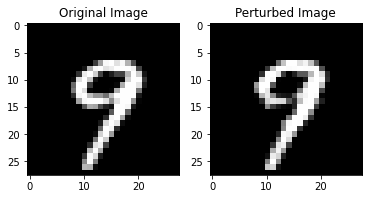

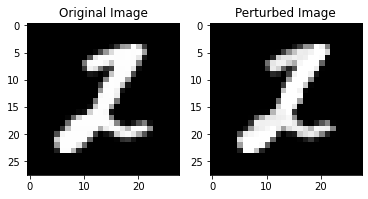

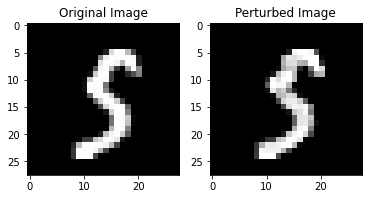

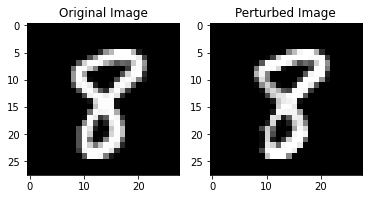

In [21]:
print("Saving Adversarial Visualizations for 10-step PGD Attack...")
        #render images
        #generate 10 random integers between 0 and len(images)-1
randomIndexes = []
for i in range(10):
    n = random.randint(0,len(images)-1)
    randomIndexes.append(n)

for imageIndex in randomIndexes:
    targetImage = images[imageIndex]
    pertubedImage = perturbations[imageIndex]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # add .detach().numpy() since Tensor requires grad
    targetReshaped = targetImage.reshape(-1,28,28)[imageIndex,:,:].detach().numpy()
    ax1.imshow(targetReshaped, cmap='gray')
    ax1.set_title('Original Image')
    
    # add .detach().numpy() since Tensor requires grad
    perturbedReshaped = pertubedImage.reshape(-1,28,28)[imageIndex,:,:].detach().numpy()
    ax2.imshow(perturbedReshaped, cmap='gray')
    ax2.set_title('Perturbed Image')

    plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/PGD-L2/' + str(imageIndex) + '.png')